Los autoencoders son una herramienta muy poderosa que está pensada para hacer representaciones eficientes de los datos, la máquina va a aprender a representar los datos de manera eficiente.

Un autoencoder básicamente lo que hace es intentar aprender una función que comprime los datos que recibe reduciéndolos a una representación codificada de dimensión mucho menor y luego los reconstruye a su forma original o a una aproximación cercana.

Para poder usar los autoencoders tenemos que descargar la librería de Tensorflow, ya que no viene con Anaconda.

In [1]:
!pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   - -------------------------------------- 8.4/332.0 MB 42.3 MB/s eta 0:00:08
   -- ------------------------------------- 17.0/332.0 MB 42.7 MB/s eta 0:00:08
   --- ------------------------------------ 26.0/332.0 MB 43.0 MB/s eta 0:00:08
   ---- ----------------------------------- 33.6/332.0 MB 40.8 MB/s eta 0:00:08
   ---- ----------------------------------- 40.6/332.0 MB 39.8 MB/s eta 0:00:08
   ----- ---------------------------------- 44.8/332.0 MB 36.8 MB/s eta 0:00:08
   ------ --------------------------------- 50.6/332.0 MB 35.6 MB/s eta 0:00:08
   ------ --------------------------------- 55.1/332.0 MB 34.0 MB/s eta 0:00:09
   ------- -------------------------------- 59.8/332.0 MB 32.3 MB/s eta 0:00:09
   ------- -------------------------------- 64.5/332.0 MB 31.2 MB/s eta 0:00:09
   -------- ------------------------------- 69.5/332.0 MB 30.4 MB/s eta 0:00:09
   --------- ------------------------------ 75.0/3

In [2]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

In [4]:
digitos = load_digits()
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
digitos['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
digitos['data'][0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

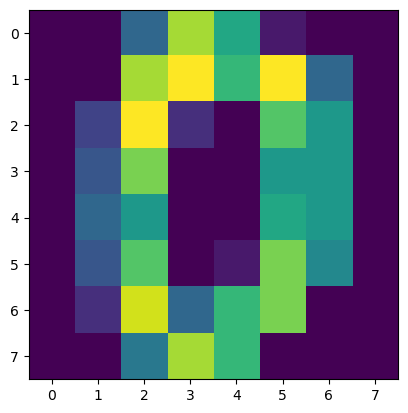

In [12]:
plt.imshow(digitos['data'][0].reshape(8, 8));

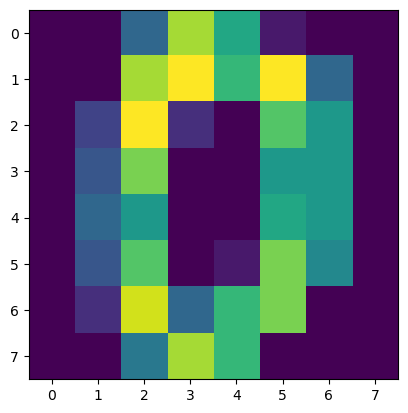

In [17]:
plt.imshow(digitos['images'][0]);

In [18]:
X = digitos['data']

In [22]:
# normalizar valores
X = X / 16.0 # se divide entre 16 porque los numeros de digitos tipicamente
             # tienen valores en el rango de 0 - 16, asi que dividiendo sus valores
             # entre 16.0 nos aseguramos que el resultado este entre 0 y 1

In [23]:
X_entrena, X_prueba = train_test_split(X, test_size=0.2, random_state=42)

In [24]:
imagen_entrada = Input(shape=(64, )) # es la forma especifica que el modelo va a esperar que tengamos nuestros datos
                                     # o sea que el arreglo de 8x8 va a pasar de forma aplanada siendo un arreglo de una diemension

In [25]:
codificado = Dense(32, activation='relu')(imagen_entrada)

In [27]:
decodificado = Dense(64, activation='sigmoid')(codificado)